In [2]:
import pandas as pd

# Task 1

## 1 Import .csv files

In [3]:
# We will create a multidimensional dataset with in dimension
# dim 1: weather conditions
# dim 2: the file label

# Initializing label sets
weatherconditions = ["clear-night", "clear-noon", "clear-sunset", "haze-noon", "haze-sunset", "rain-noon"]
labelset = ["ctl", "cvip", "traj"]

# Necessary time stamps to get the correct path to the file
timestamps = { 
    "clear-night" : "0912_145136",
    "clear-noon" : "0912_144500",
    "clear-sunset" : "0912_144802",
    "haze-noon" : "0912_144913",
    "haze-sunset" : "0912_145024",
    "rain-noon" : "0912_144715"
}

# Initializing the dataset
dataset = dict()

# Filling the dataset with the imports
for weather in weatherconditions:
    dataset[weather] = dict()
    for label in labelset:
        dataset[weather][label] = pd.read_csv("results\\MP1\\OOD-Weather\\campaign_results\\route_highway_epoch24_" 
                                              + weather 
                                              + "_fi_ghost_cutin\\routes_fi_route_highway-"
                                              + timestamps[weather]
                                              + "-data_fi_ghost_cutin-single_" 
                                              + label 
                                              + ".csv"
                                            )
# Result: dataset[weather][label] gives the imported csv of the file.

for weather in weatherconditions:
    for label in labelset:
        print(dataset[weather][label].head())

      ts  agent_id  throttle     steer  brake
0  74325         0       0.9 -0.002665    0.0
1  74326         0       0.9 -0.011529    0.0
2  74327         0       0.9 -0.009963    0.0
3  74328         0       0.9 -0.011508    0.0
4  74329         0       0.9  0.000712    0.0
      ts  agent_id        cvip      cvip_x     cvip_y      cvip_z
0  74325         0  500.491189  198.767441 -95.832657 -499.819366
1  74326         0    5.595580  195.567444 -90.832657    0.100000
2  74327         0    5.592365  195.567444 -90.832657    0.095407
3  74328         0    5.589578  195.567444 -90.832657    0.084691
4  74329         0    5.587154  195.567444 -90.832657    0.069311
      ts  agent_id           x         y         z    v
0  74325         0  192.362411 -86.26268  0.539326  0.0
1  74326         0  192.362411 -86.26268  0.491906  0.0
2  74327         0  192.362411 -86.26268  0.438374  0.0
3  74328         0  192.362411 -86.26268  0.378732  0.0
4  74329         0  192.362411 -86.26268  0.3129

## 2 Summarize

a. Duration of the scene

In [4]:
# Initialize the statistics dataset
statistics = dict()

# Compute the duration for each weather condition
for weather in weatherconditions:
    statistics[weather] = dict()
    statistics[weather]["Duration"] = dataset[weather]["ctl"]["ts"].iloc[-1] - dataset[weather]["ctl"]["ts"].iloc[0]

b. Means and standard deviations of attributes

In [5]:
# Compute the mean and standard deviation, add it to the statistics dictionary.
for weather in weatherconditions:
    for label in labelset:
        for stat in ["throttle", "steer", "brake", "cvip", "x", "y", "z"]:
            a = dataset[weather][label].get(stat) # Returns None if stat is not a key in the dictionary
            if a is not None: # Add the mean and std as a list of size two to the key stat
                statistics[weather][stat] = [round(a.mean(), 3), round(a.std(), 3)] 

# Summary: statistics[weather] is a collection of stats of the scenario "weather". 
# It has a key "Duration" which outputs an integer
# The other keys output a list of [mean, std], both rounded to three decimal places.

# If you want to use a for loop to run through the keys of stat, use "for stat in list(statistics[weather].keys())".
# You might want to exclude "Duration" in the for loop.
# This way you don't have to copy the list of stats anymore.


In [6]:
pd.DataFrame(statistics)

,clear-night,clear-noon,clear-sunset,haze-noon,haze-sunset,rain-noon
Duration,818,752,756,754,762,400
throttle,"[0.62, 0.342]","[0.609, 0.282]","[0.611, 0.281]","[0.602, 0.299]","[0.607, 0.299]","[0.648, 0.272]"
steer,"[0.004, 0.046]","[0.0, 0.005]","[0.0, 0.005]","[0.001, 0.005]","[0.001, 0.005]","[-0.0, 0.004]"
brake,"[0.105, 0.307]","[0.058, 0.235]","[0.057, 0.232]","[0.057, 0.232]","[0.056, 0.231]","[0.042, 0.202]"
cvip,"[29.198, 29.973]","[19.514, 24.282]","[20.058, 24.641]","[19.996, 24.134]","[20.967, 24.883]","[7.052, 24.735]"
x,"[191.311, 1.168]","[192.92, 0.403]","[192.946, 0.401]","[192.94, 0.41]","[192.944, 0.41]","[192.631, 0.252]"
y,"[-31.8, 39.65]","[-31.315, 40.557]","[-31.223, 40.404]","[-31.74, 40.735]","[-31.502, 40.483]","[-63.985, 21.067]"
z,"[0.036, 0.034]","[0.036, 0.035]","[0.036, 0.035]","[0.036, 0.035]","[0.036, 0.035]","[0.037, 0.048]"


In [0.62,0.342] the first number is the mean and the standard deviation

## 3 Plot

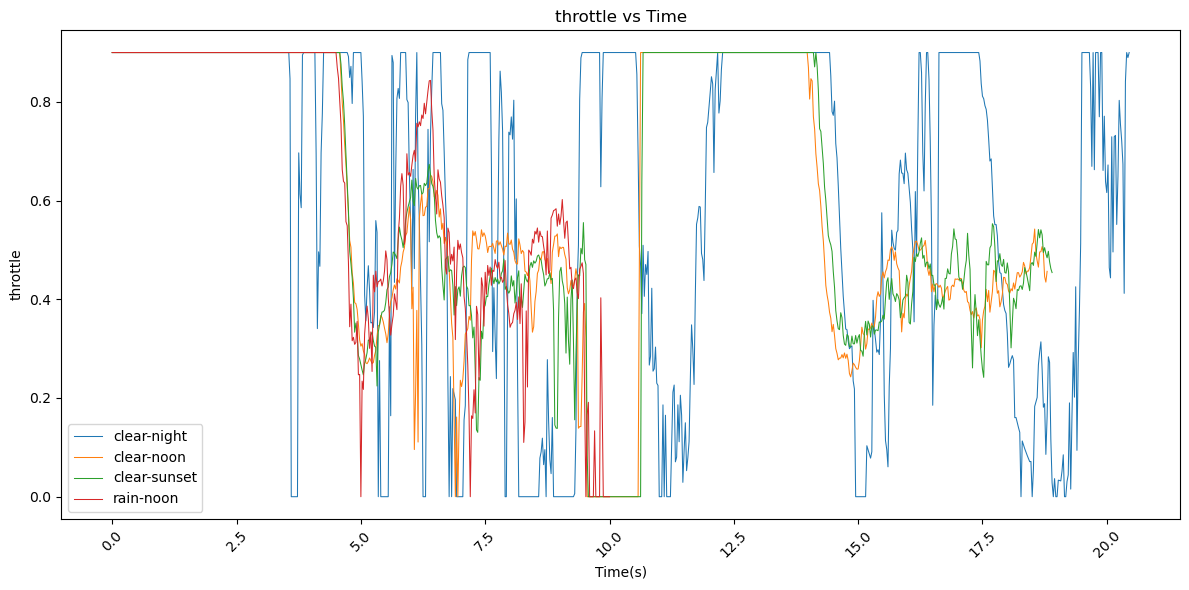

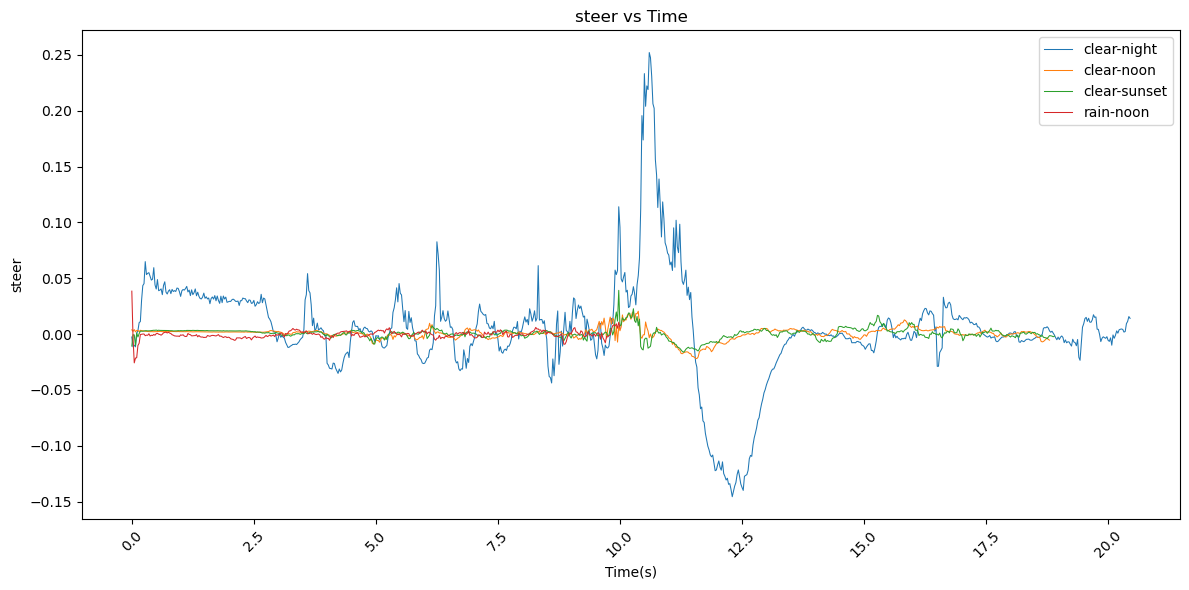

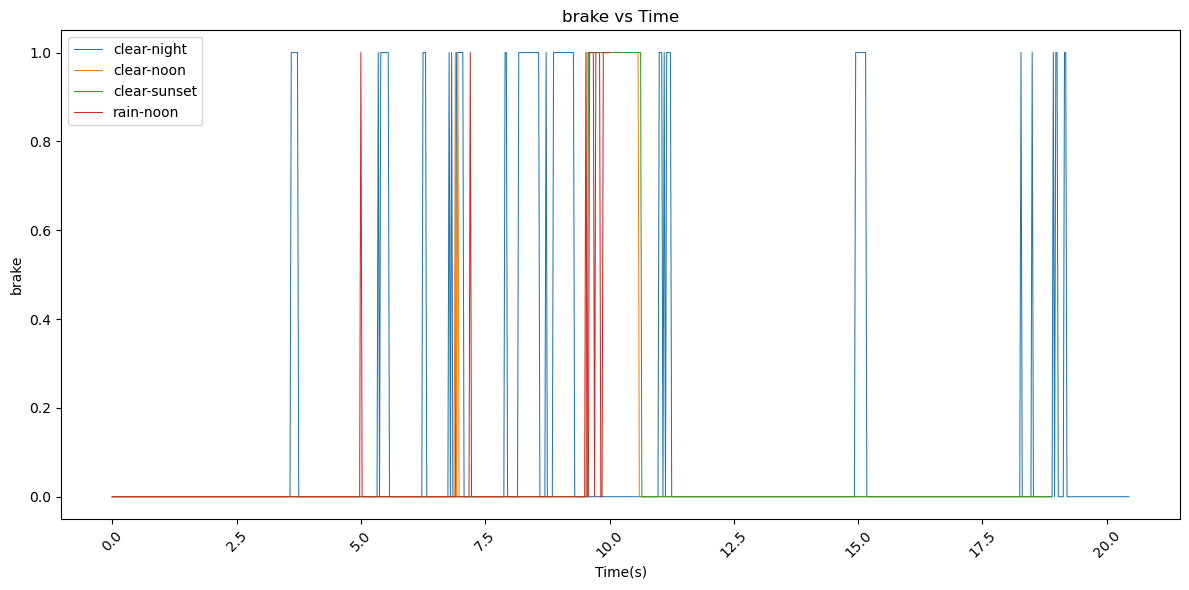

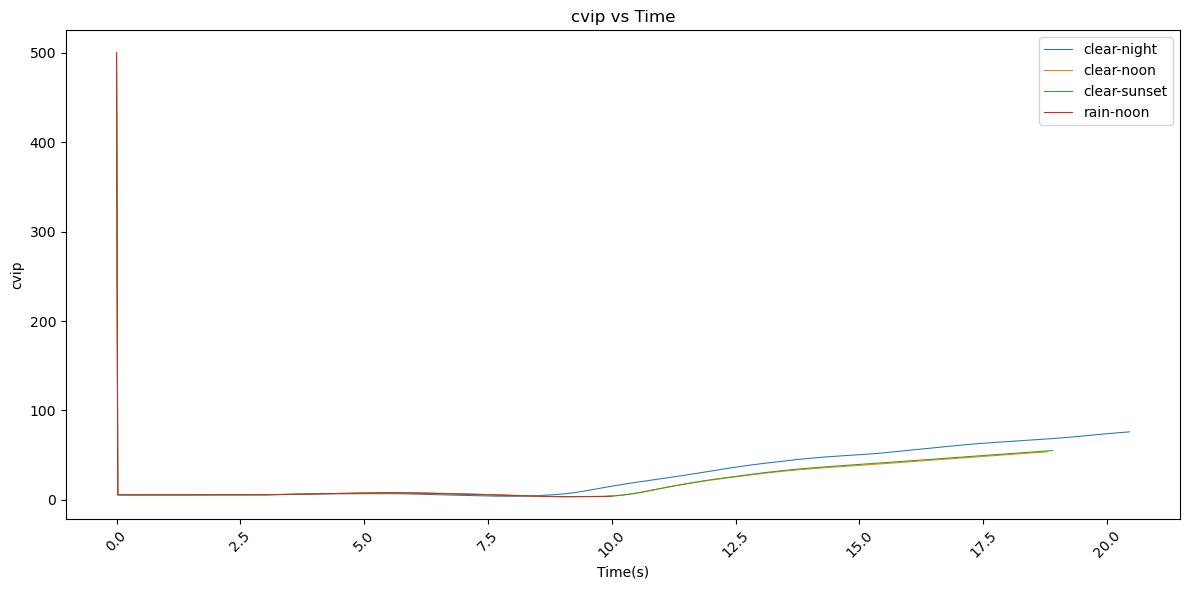

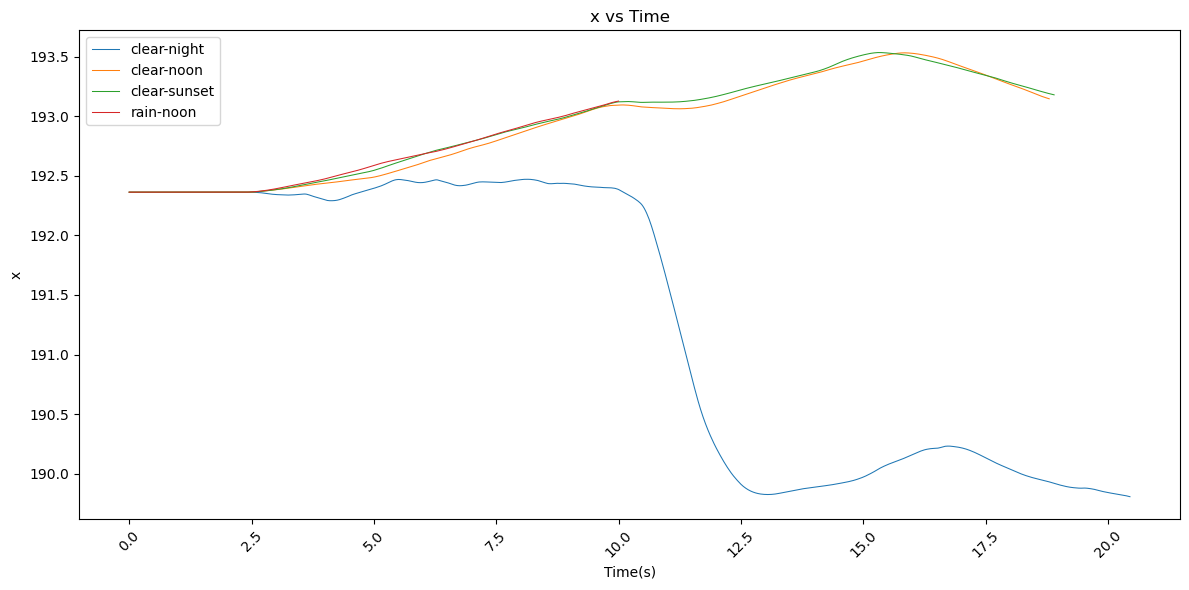

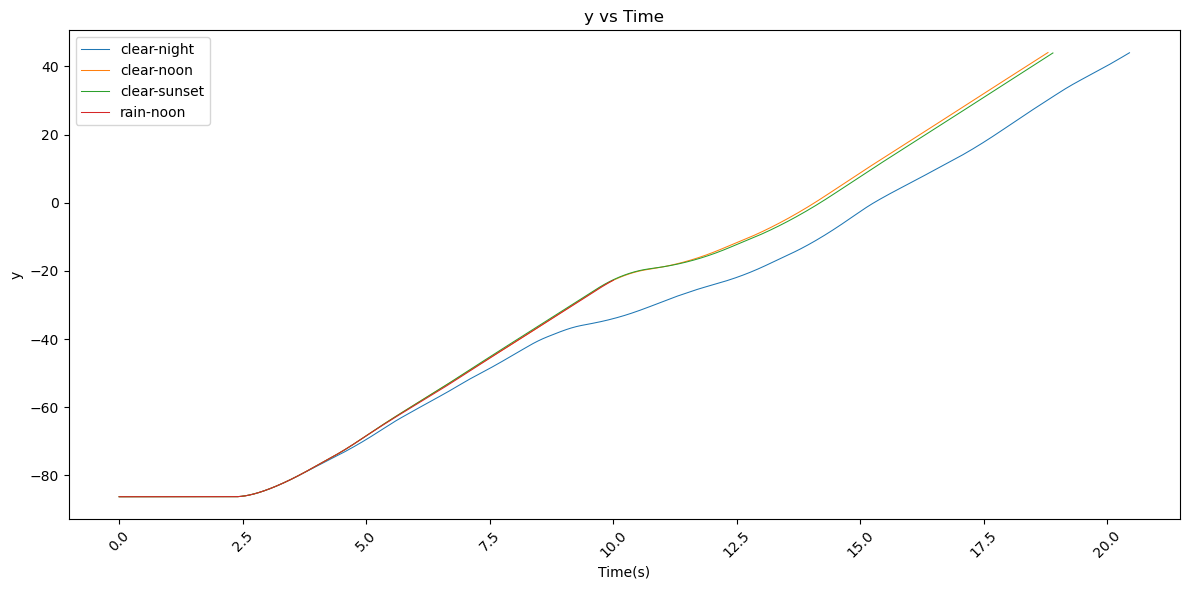

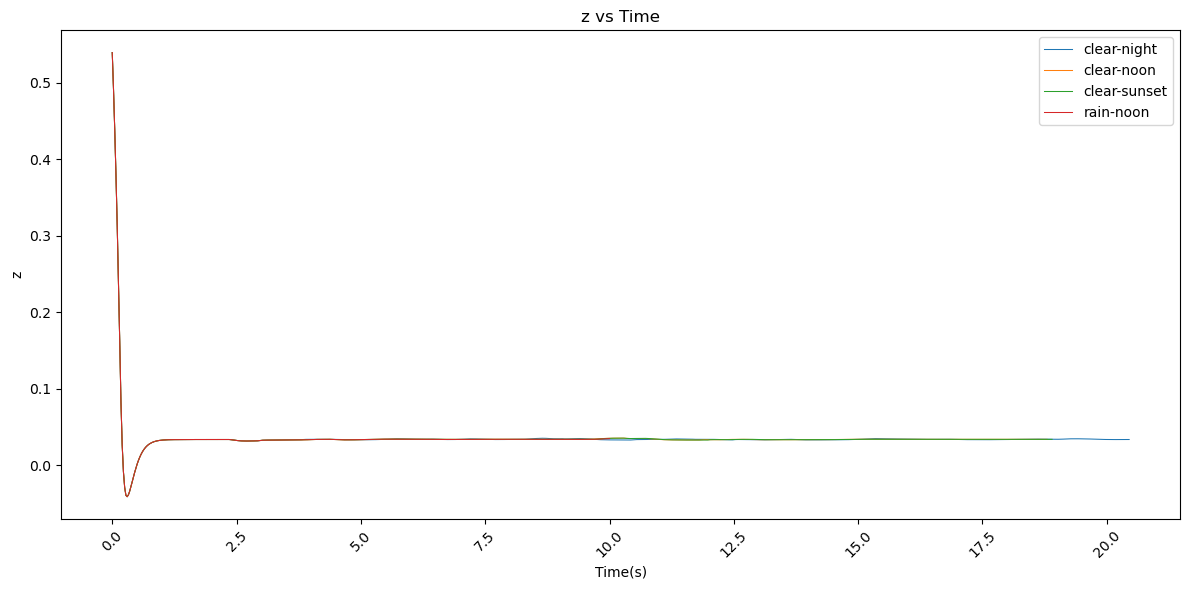

In [7]:
import matplotlib.pyplot as plt

items_to_plot = [("ctl","throttle"), ("ctl","steer"), ("ctl","brake"),("cvip","cvip"), ("traj","x"), ("traj","y"), ("traj","z")] 

no_haze = ["clear-night", "clear-noon", "clear-sunset", "rain-noon"]

for item in items_to_plot:
    plt.figure(figsize=(12, 6))
    for weather in no_haze:
        plt.plot((dataset[weather][item[0]]["ts"]-dataset[weather][item[0]]["ts"].iloc[0])/40
                 , dataset[weather][item[0]][item[1]], label=weather, linewidth=0.75)

    plt.title(item[1]+" vs Time")
    plt.xlabel("Time(s)")
    plt.ylabel(item[1])
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()